In [1]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

# 3 Qubits Simon's Algorithm

C:\Users\Minnu\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


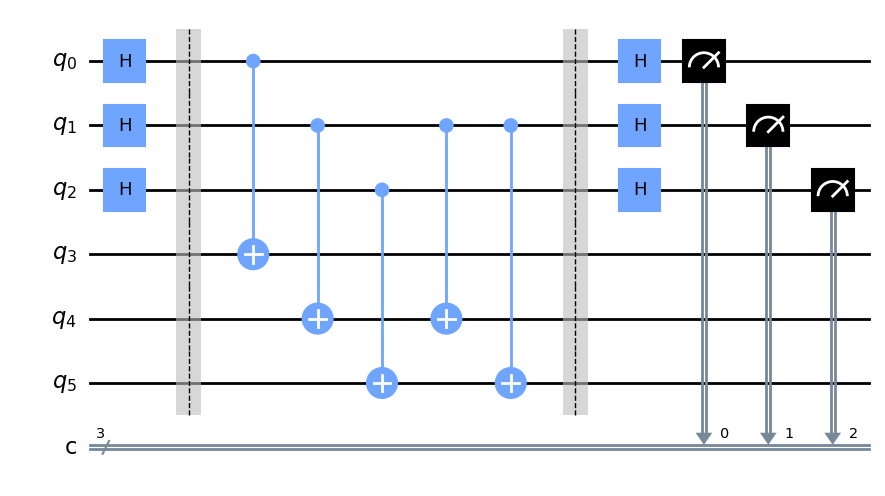

In [2]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw("mpl")

Measured output: {'111': 254, '000': 240, '001': 270, '110': 260}


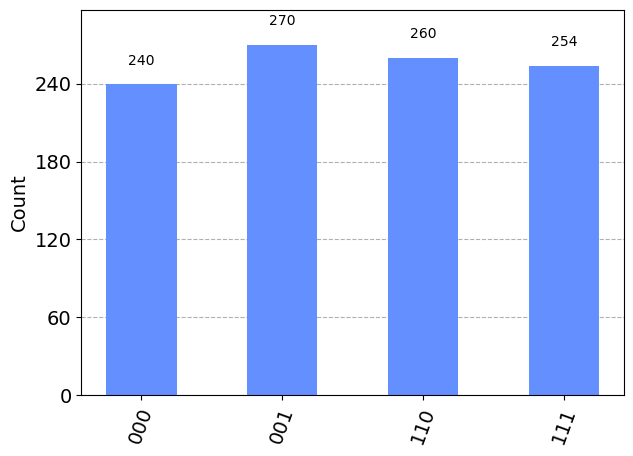

In [3]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
print(f"Measured output: {counts}")
plot_histogram(counts)

# 2 Qubits Simon's Algorithm

In [4]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram


In [5]:
# Function to create Simon's oracle for a given hidden string 's'
def simon_oracle(s):
    n = len(s)
    oracle_circuit = QuantumCircuit(n*2, n)
    
    # Apply CNOT gates according to the hidden string 's'
    for qubit in range(n):
        if s[qubit] == '1':
            oracle_circuit.cx(qubit, n + qubit)
    
    return oracle_circuit

C:\Users\Minnu\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


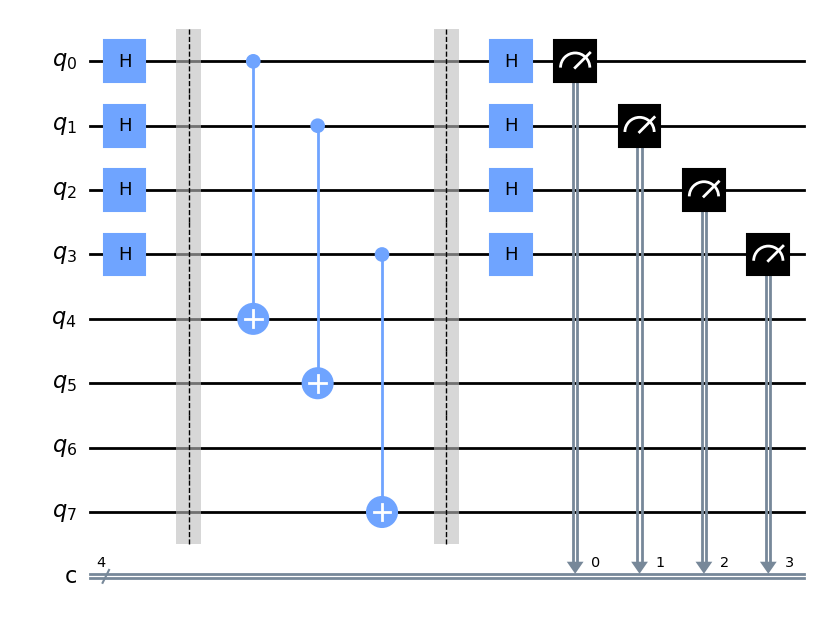

In [6]:
# Hidden string 'b'
b = '1101'

# Number of qubits
n = len(b)

# Create a quantum circuit
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates to the first n qubits
simon_circuit.h(range(n))

# Apply a barrier for visual separation
simon_circuit.barrier()

# Compose the circuit with the Simon oracle for the given hidden string 'b'
simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply a barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the first n qubits
simon_circuit.h(range(n))

# Measure the qubits
simon_circuit.measure(range(n), range(n))

# Visualize the circuit
simon_circuit.draw("mpl")


Measured output: {'0011': 122, '0001': 105, '1010': 144, '1001': 123, '0000': 133, '1000': 134, '1011': 133, '0010': 130}


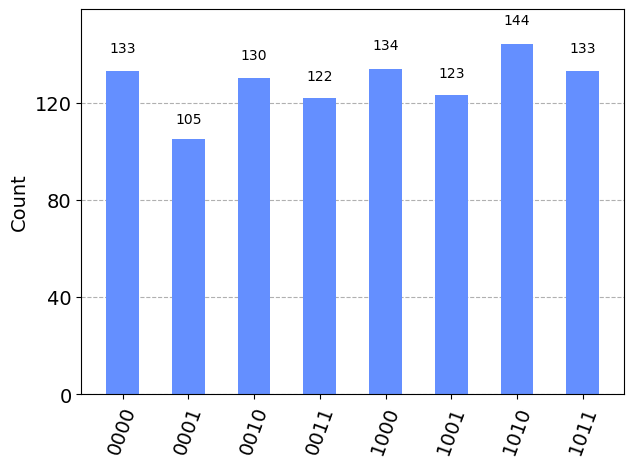

In [7]:
# Transpile the circuit for the simulator
simon_circuit = transpile(simon_circuit, Aer.get_backend('qasm_simulator'))

# Run the simulation
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(simon_circuit).result()

# Display the measured output
counts = result.get_counts(simon_circuit)
print(f"Measured output: {counts}")

# Plot the results
plot_histogram(counts)
